<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/GaussianNB_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Iris flower dataset
https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c

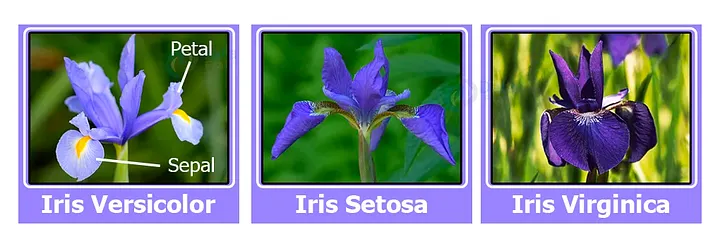

The Iris flower dataset is a classic dataset in the field of machine learning and statistical analysis. It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower. The dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper, “The use of multiple measurements in taxonomic problems.”

In this notebook, we will explore the Iris dataset and use various statistical and machine learning techniques to better understand the relationships between the different features and the species of the flowers. We will also use the dataset to build and evaluate a classifier that can predict the species of an iris flower based on its measurements.

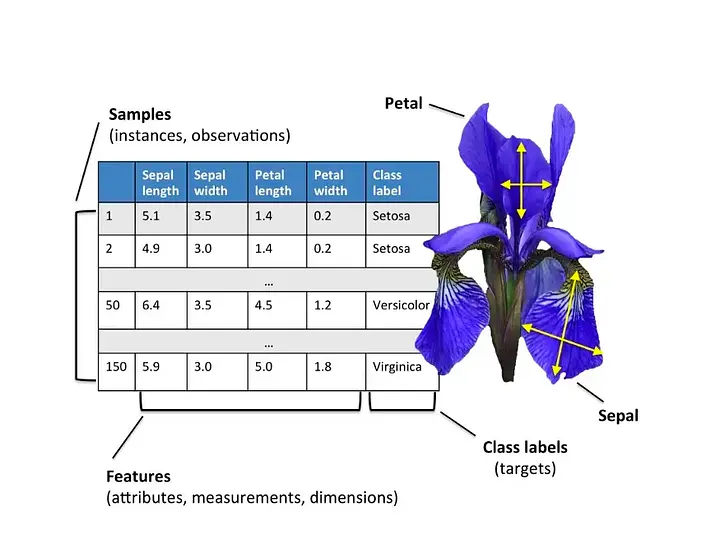

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do K-NN clasification.

In [14]:
import pandas as pd

# Įkeliame iris duomenų rinkinį
iris = load_iris()

# Duomenis paverčiame į DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Įtraukiame ir klasių (target) stulpelį
df['target'] = iris.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
df.groupby(['target']).describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

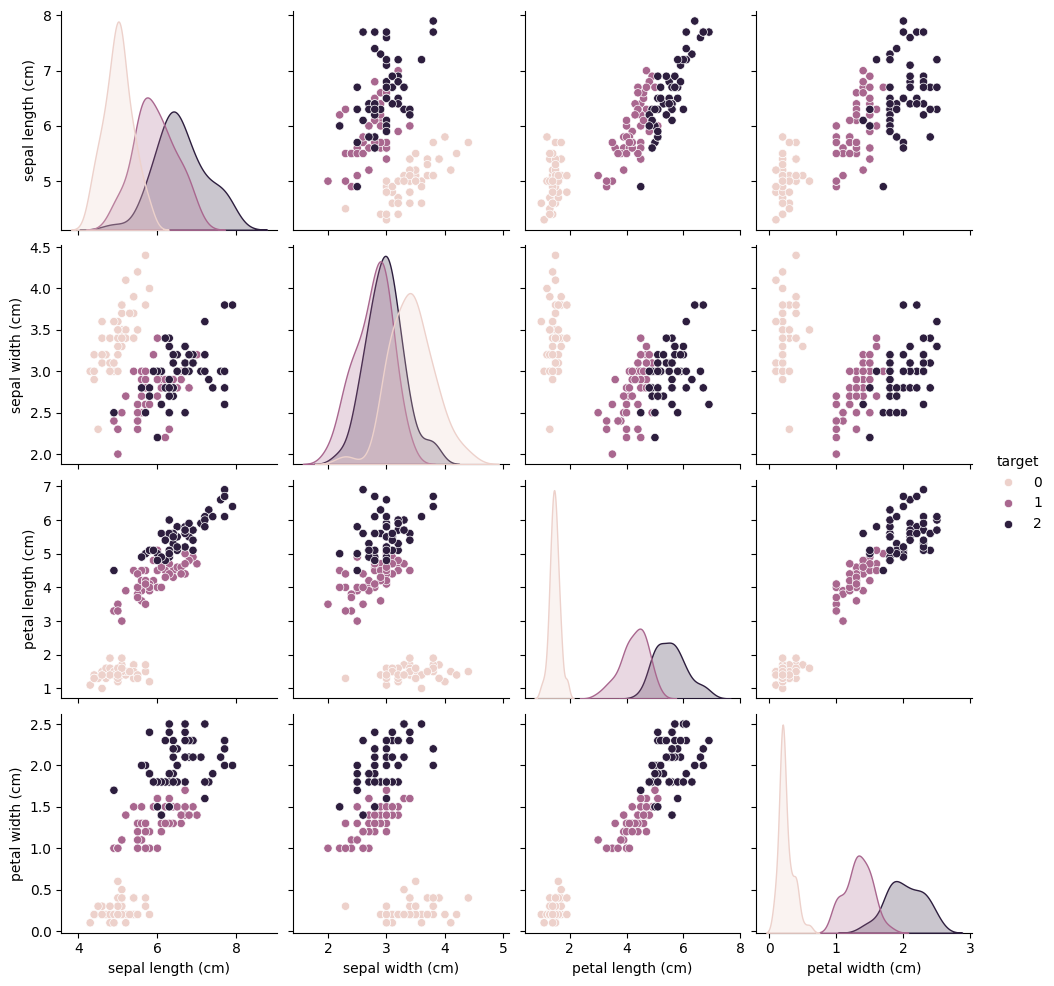

In [36]:
# Visualize the whole dataset
import seaborn as sns
sns.pairplot(df,hue="target")
plt.show()

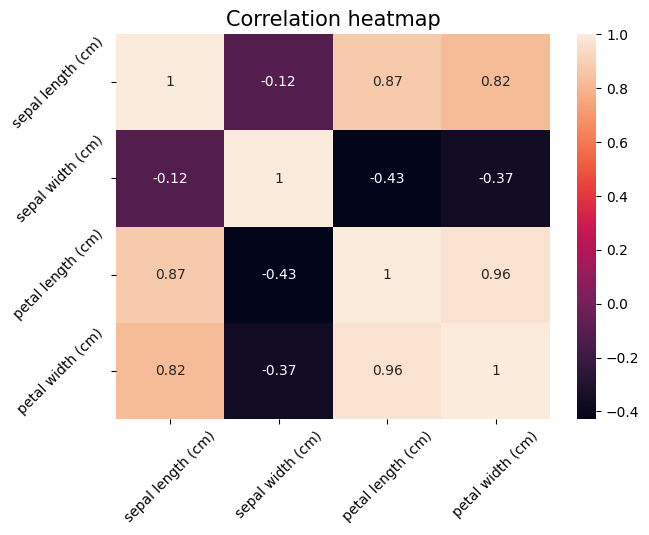

In [34]:
fig, axes = plt.subplots(figsize=(7,5))
# Plotting the heatmap
sns.heatmap(df.iloc[:,:4].corr('pearson'), annot=True)
axes.tick_params(labelrotation=45)
plt.title('Correlation heatmap', fontsize = 15);
plt.show()

The sepal width and width are not correlated while the are highly correlated. Using just the highly correlated measurements might increase our accurasy model

In [37]:
#load data
X, y = load_iris(return_X_y=True)


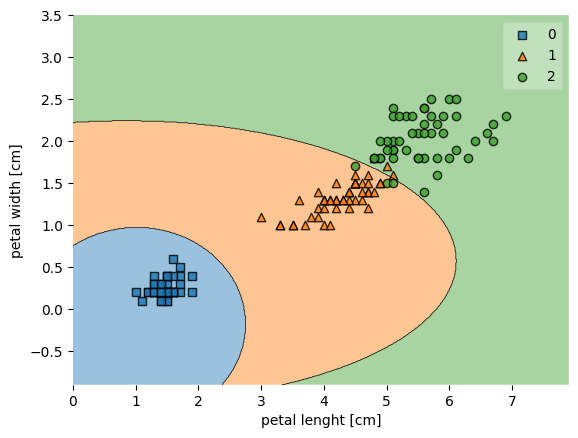

In [40]:
#train model
gnb = GaussianNB()
gnb.fit(X[:,2:], y)
plot_decision_regions(X[:,2:], y, gnb)
plt.xlabel('petal lenght [cm]')
plt.ylabel('petal width [cm]')
plt.show()

In [42]:
#parameters of the model

print("Means (theta_):", gnb.theta_)
print("Variances (var_):", gnb.var_)
print("Class priors (class_prior_):", gnb.class_prior_)
print("Classes (classes_):", gnb.classes_)
print("Class counts (class_count_):", gnb.class_count_)
print("Epsilon (epsilon_):", gnb.epsilon_)
print("Var Smoothing:", gnb.var_smoothing)

Means (theta_): [[1.462 0.246]
 [4.26  1.326]
 [5.552 2.026]]
Variances (var_): [[0.029556 0.010884]
 [0.2164   0.038324]
 [0.298496 0.073924]]
Class priors (class_prior_): [0.33333333 0.33333333 0.33333333]
Classes (classes_): [0 1 2]
Class counts (class_count_): [50. 50. 50.]
Epsilon (epsilon_): 3.0955026666666677e-09
Var Smoothing: 1e-09


In [41]:
y_pred = gnb.predict(X[:,2:])
print("Number of mislabeled points out of a total %d points : %d"  % (X.shape[0], (y != y_pred).sum()))
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y,y_pred)))


Number of mislabeled points out of a total 150 points : 6
Accuracy score from sklearn library:= 96.00 


In [49]:
#rezultatai
from sklearn.metrics import confusion_matrix, f1_score, classification_report
print("confusion matrix \n", confusion_matrix(y, y_pred))
print("F1:\n", f1_score(y, y_pred, average='weighted'))

target_names = ['Setosa',' Versicolor', 'Virginica']
print(classification_report(y, y_pred, target_names=target_names))

confusion matrix 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
F1:
 0.96
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.94      0.94      0.94        50
   Virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



# Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting


In [50]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [52]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std=(X_train -mu)/sigma
X_test_std=(X_test -mu)/sigma
X_valid_std=(X_valid -mu)/sigma

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

In [55]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

Accuracy score from sklearn library:= 96.67 


With STANDARTISATION STD

In [56]:
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
y_pred = gnb.predict(X_test_std)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

Accuracy score from sklearn library:= 96.67 


MIN-MAX scaling

In [57]:
gnb = GaussianNB()
gnb.fit(X_train_mm, y_train)
y_pred = gnb.predict(X_test_mm)
print("Accuracy score from sklearn library:= %2.2f " %( 100 * metrics.accuracy_score(y_test,y_pred)))

Accuracy score from sklearn library:= 96.67 


In [88]:
X_train_mm[0:40,0:]=np.nan
X_train_mm

array([[       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,

In [89]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X_train_mm = imputer.fit_transform(X_train_mm)
X_train_mm

array([[0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048, 0.59322034, 0.54166667],
       [0.45833333, 0.47619048,

In [60]:
import numpy as np
np.bool = np.bool_

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris, load_breast_cancer

iris = load_iris()
X, y = iris.data, iris.target

train_ind, valid_ind = train_test_split(np.arange(X.shape[0]),
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y)

pipe = make_pipeline(('scaler'),
                     GaussianNB())

params = {'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer(n_quantiles=2), QuantileTransformer(n_quantiles=3), QuantileTransformer(n_quantiles=5), 'passthrough']}

split = PredefinedHoldoutSplit(valid_indices=valid_ind)

grid = GridSearchCV(pipe,
                    param_grid=params,
                    cv=split)

grid.fit(X, y)

GridSearchCV(cv=<mlxtend.evaluate.holdout.PredefinedHoldoutSplit object at 0x7fe7c1eecdd0>,
             estimator=Pipeline(steps=[('scaler', 'scaler'),
                                       ('gaussiannb', GaussianNB())]),
             param_grid={'scaler': [MinMaxScaler(), StandardScaler(),
                                    RobustScaler(),
                                    QuantileTransformer(n_quantiles=2),
                                    QuantileTransformer(n_quantiles=3),
                                    QuantileTransformer(n_quantiles=5),
                                    'passthrough']})

In [80]:
grid.cv_results_

{'mean_fit_time': array([0.014117  , 0.00707865, 0.0091846 , 0.00801134, 0.00816822,
        0.00827408, 0.00398827]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.00820947, 0.00170732, 0.00378919, 0.00404048, 0.00400281,
        0.00395608, 0.00335884]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0.]),
 'param_scaler': masked_array(data=[MinMaxScaler(), StandardScaler(), RobustScaler(),
                    QuantileTransformer(n_quantiles=2),
                    QuantileTransformer(n_quantiles=3),
                    QuantileTransformer(n_quantiles=5), 'passthrough'],
              mask=[False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'scaler': MinMaxScaler()},
  {'scaler': StandardScaler()},
  {'scaler': RobustScaler()},
  {'scaler': QuantileTransformer(n_quantiles=2)},
  {'scaler': QuantileTransformer(n_quantiles=3)},
  {'scaler': QuantileTransformer(n_quantiles=5)

In [81]:
print(grid.best_score_)
print(grid.best_params_)

0.9666666666666667
{'scaler': MinMaxScaler()}


In [82]:
clf = grid.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True, stratify=y)
clf.fit(X_train, y_train)
print('Test accuracy: %.2f%%' % (clf.score(X_test, y_test)*100))

Test accuracy: 96.67%


In [87]:
sum(clf.predict(X_test) == y_test)/len(y_test)

np.float64(0.9666666666666667)